In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import metrics
import xgboost as xgb

In [2]:
# Importing dataset
data = pd.read_csv('dataset.csv')

# Replacing IDs with more sensible values
lookup_table = pd.DataFrame({
    'reviewId': data['reviewId'].unique(),
    'newId': np.arange(1, 4801)
})

data = pd.merge(data, lookup_table, on="reviewId", how="left")

# Removing unnecessary columns
data = data[['newId', 'content', 'userLang', 'score', 'app_id']]
data['score'][(data['score'] == 2) | (data['score'] == 3) | (data['score'] == 4)] = 2
data['score'][data['score'] == 5] = 3

# Simplifying IDs for apps
data['app_id'] = data['app_id'].str.extract(r'(?<=\.)(\w+)')

# Removing Japanese language since Japanese and English reviews are the same
data = data[data['userLang'] != 'JP']

# Remove unnecessary punctuation and special characters that do not contribute to score analysis
data['content'] = data['content'].replace('[^a-zA-Z\s]', '', regex=True)
data['userLang'] = data['userLang'].str.strip()

# Splitting into multiple dataframes based on languages
en = data[data['userLang'] == 'EN']
it = data[data['userLang'] == 'IT']
fr = data[data['userLang'] == 'FR']
de = data[data['userLang'] == 'DE']

# Train-test split
np.random.seed(420)
sample = np.random.choice([True, False], len(en), replace=True, p=[0.8, 0.2])

# Creating document-term matrices
vectorizer = CountVectorizer(stop_words='english')
en_matrix = vectorizer.fit_transform(en['content'])
it_matrix = vectorizer.fit_transform(it['content'])
fr_matrix = vectorizer.fit_transform(fr['content'])
de_matrix = vectorizer.fit_transform(de['content'])

# Classifiers
# English
en_classifier = RandomForestClassifier(n_estimators=10, max_depth=256, random_state=420)
en_classifier.fit(en_matrix[sample], en['score'][sample])

en_predicted = en_classifier.predict(en_matrix[~sample])
conf_matrix = confusion_matrix(en['score'][~sample], en_predicted)
accuracy_en_rf = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision_en_rf = precision_score(en['score'][~sample], en_predicted, average='macro')
recall_en_rf = recall_score(en['score'][~sample], en_predicted, average='macro')
f1_en_rf = f1_score(en['score'][~sample], en_predicted, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_en_rf)
print("\nPrecision:", precision_en_rf)
print("Recall:", recall_en_rf)
print("F1-Score:", f1_en_rf)

# Italian
it_classifier = RandomForestClassifier(n_estimators=10, max_depth=256, random_state=420)
it_classifier.fit(it_matrix[sample], it['score'][sample])

it_predicted = it_classifier.predict(it_matrix[~sample])
conf_matrix = confusion_matrix(it['score'][~sample], it_predicted)
accuracy_it_rf = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision_it_rf = precision_score(en['score'][~sample], en_predicted, average='macro')
recall_it_rf = recall_score(en['score'][~sample], en_predicted, average='macro')
f1_it_rf = f1_score(en['score'][~sample], en_predicted, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_it_rf)
print("\nPrecision:", precision_it_rf)
print("Recall:", recall_it_rf)
print("F1-Score:", f1_it_rf)

# French
fr_classifier = RandomForestClassifier(n_estimators=10, max_depth=256, random_state=420)
fr_classifier.fit(fr_matrix[sample], fr['score'][sample])

fr_predicted = fr_classifier.predict(fr_matrix[~sample])
conf_matrix = confusion_matrix(fr['score'][~sample], fr_predicted)
accuracy_fr_rf = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision_fr_rf = precision_score(en['score'][~sample], en_predicted, average='macro')
recall_fr_rf = recall_score(en['score'][~sample], en_predicted, average='macro')
f1_fr_rf = f1_score(en['score'][~sample], en_predicted, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_fr_rf)
print("\nPrecision:", precision_fr_rf)
print("Recall:", recall_fr_rf)
print("F1-Score:", f1_fr_rf)

# German
de_classifier = RandomForestClassifier(n_estimators=10, max_depth=256, random_state=420)
de_classifier.fit(de_matrix[sample], de['score'][sample])

de_predicted = de_classifier.predict(de_matrix[~sample])
conf_matrix = confusion_matrix(de['score'][~sample], de_predicted)
accuracy_de_rf = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision_de_rf = precision_score(en['score'][~sample], en_predicted, average='macro')
recall_de_rf = recall_score(en['score'][~sample], en_predicted, average='macro')
f1_de_rf = f1_score(en['score'][~sample], en_predicted, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_de_rf)
print("\nPrecision:", precision_de_rf)
print("Recall:", recall_de_rf)
print("F1-Score:", f1_de_rf)


/tmp/ipykernel_863/2675483035.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'][data['score'] == 5] = 3


Confusion Matrix:
 [[ 38   6  29]
 [ 15   3  31]
 [  5   5 105]]

Accuracy: 0.6160337552742616

Precision: 0.5019405881474847
Recall: 0.4982719710874224
F1-Score: 0.4751302556646067
Confusion Matrix:
 [[52 13 22]
 [21 14 23]
 [11  8 73]]

Accuracy: 0.5864978902953587

Precision: 0.5019405881474847
Recall: 0.4982719710874224
F1-Score: 0.4751302556646067
Confusion Matrix:
 [[ 20   4  23]
 [ 15   5  31]
 [  7   3 129]]

Accuracy: 0.6497890295358649

Precision: 0.5019405881474847
Recall: 0.4982719710874224
F1-Score: 0.4751302556646067
Confusion Matrix:
 [[82  3 20]
 [40  9 17]
 [ 6  3 57]]

Accuracy: 0.6244725738396625

Precision: 0.5019405881474847
Recall: 0.4982719710874224
F1-Score: 0.4751302556646067


In [3]:
dtm_df = pd.read_csv('dtm_df_en.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['score'], test_size=0.2, random_state=42)

# XGBoost model training
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 7,
    'eta': 0.04960584,
    'nrounds': 118,
    'gamma': 0.06084936,
    'colsample_bytree': 0.618977,
    'min_child_weight': 1,
    'subsample': 0.8547104,
    'eval_metric': 'merror'
}

xg_model = xgb.XGBClassifier(**params)
xg_model.fit(X_train, y_train)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision_en = metrics.precision_score(y_test, predictions, average='weighted')
recall_en = metrics.recall_score(y_test, predictions, average='weighted')
f1_score_en = metrics.f1_score(y_test, predictions, average='weighted')
accuracy_en = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_en)
print("\nPrecision:", precision_en)
print("Recall:", recall_en)
print("F1-Score:", f1_score_en)


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[ 50   4  36]
 [  9   1  27]
 [  8   2 103]]

Accuracy: 0.6416666666666667

Precision: 0.594018130089655
Recall: 0.6416666666666667
F1-Score: 0.5935014612600907


In [4]:
dtm_df = pd.read_csv('dtm_df_it.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['score'], test_size=0.2, random_state=42)

# XGBoost model training
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 7,
    'eta': 0.04960584,
    'nrounds': 118,
    'gamma': 0.06084936,
    'colsample_bytree': 0.618977,
    'min_child_weight': 1,
    'subsample': 0.8547104,
    'eval_metric': 'merror'
}

xg_model = xgb.XGBClassifier(**params)
xg_model.fit(X_train, y_train)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision_it = metrics.precision_score(y_test, predictions, average='weighted')
recall_it = metrics.recall_score(y_test, predictions, average='weighted')
f1_score_it = metrics.f1_score(y_test, predictions, average='weighted')
accuracy_it = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_it)
print("\nPrecision:", precision_it)
print("Recall:", recall_it)
print("F1-Score:", f1_score_it)


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:51] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[42 14 26]
 [13  9 49]
 [ 5  5 77]]

Accuracy: 0.5333333333333333

Precision: 0.517890820802005
Recall: 0.5333333333333333
F1-Score: 0.48947796070195737


In [5]:
dtm_df = pd.read_csv('dtm_df_fr.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['score'], test_size=0.2, random_state=42)

# XGBoost model training
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 7,
    'eta': 0.04960584,
    'nrounds': 118,
    'gamma': 0.06084936,
    'colsample_bytree': 0.618977,
    'min_child_weight': 1,
    'subsample': 0.8547104,
    'eval_metric': 'merror'
}

xg_model = xgb.XGBClassifier(**params)
xg_model.fit(X_train, y_train)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision_fr = metrics.precision_score(y_test, predictions, average='weighted')
recall_fr = metrics.recall_score(y_test, predictions, average='weighted')
f1_score_fr = metrics.f1_score(y_test, predictions, average='weighted')
accuracy_fr = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_fr)
print("\nPrecision:", precision_fr)
print("Recall:", recall_fr)
print("F1-Score:", f1_score_fr)


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[ 16   7  27]
 [  9   5  48]
 [  0   2 126]]

Accuracy: 0.6125

Precision: 0.5599235963041933
Recall: 0.6125
F1-Score: 0.5313907552569367


In [6]:
dtm_df = pd.read_csv('dtm_df_gr.csv')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['score'], test_size=0.2, random_state=42)

# XGBoost model training
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 7,
    'eta': 0.04960584,
    'nrounds': 118,
    'gamma': 0.06084936,
    'colsample_bytree': 0.618977,
    'min_child_weight': 1,
    'subsample': 0.8547104,
    'eval_metric': 'merror'
}

xg_model = xgb.XGBClassifier(**params)
xg_model.fit(X_train, y_train)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision_de = metrics.precision_score(y_test, predictions, average='weighted')
recall_de = metrics.recall_score(y_test, predictions, average='weighted')
f1_score_de = metrics.f1_score(y_test, predictions, average='weighted')
accuracy_de = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_de)
print("\nPrecision:", precision_de)
print("Recall:", recall_de)
print("F1-Score:", f1_score_de)


/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:43:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[89  9 18]
 [23 14 20]
 [ 7  6 54]]

Accuracy: 0.6541666666666667

Precision: 0.6399984619035021
Recall: 0.6541666666666667
F1-Score: 0.6330475136849247


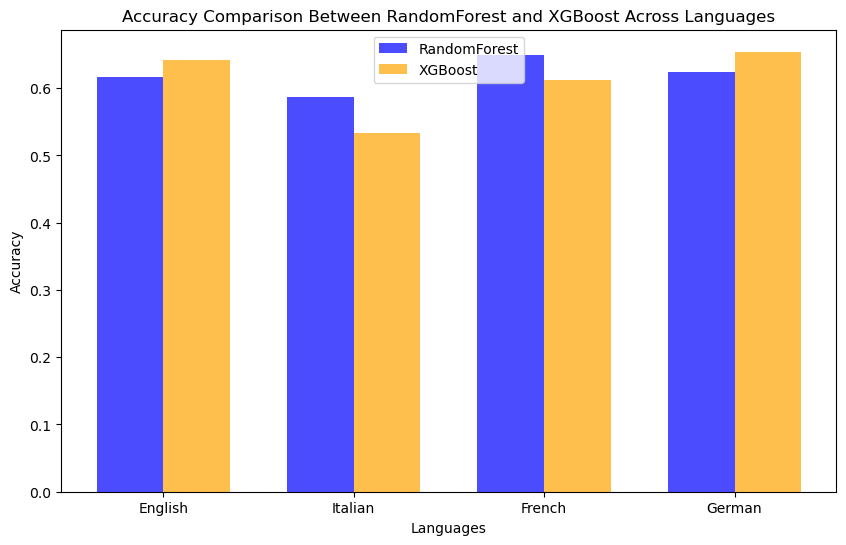

In [7]:
# Data for barplots
languages = ['English', 'Italian', 'French', 'German']

# RandomForestClassifier metrics
accuracy_rf = [accuracy_en_rf, accuracy_it_rf, accuracy_fr_rf, accuracy_de_rf]
precision_rf = [precision_en_rf, precision_it_rf, precision_fr_rf, precision_de_rf]
recall_rf = [recall_en_rf, recall_it_rf, recall_fr_rf, recall_de_rf]
f1_score_rf = [f1_en_rf, f1_it_rf, f1_fr_rf, f1_de_rf]

# XGBClassifier metrics
accuracy_xgb = [accuracy_en, accuracy_it, accuracy_fr, accuracy_de]
precision_xgb = [precision_en, precision_it, precision_fr, precision_de]
recall_xgb = [recall_en, recall_it, recall_fr, recall_de]
f1_score_xgb = [f1_score_en, f1_score_it, f1_score_fr, f1_score_de]

# Barplot for Accuracy
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(languages))

plt.bar(index, accuracy_rf, bar_width, color='blue', alpha=0.7, label='RandomForest')
plt.bar(index + bar_width, accuracy_xgb, bar_width, color='orange', alpha=0.7, label='XGBoost')

plt.title('Accuracy Comparison Between RandomForest and XGBoost Across Languages')
plt.xlabel('Languages')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width/2, languages)
plt.legend()
plt.show()

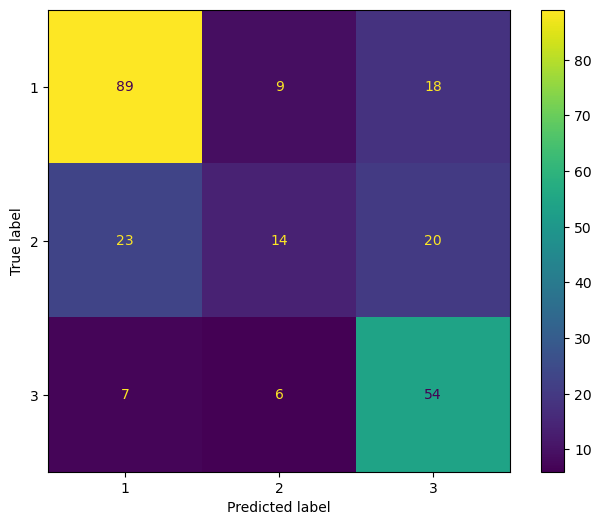

In [8]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [1, 2, 3])
fig, ax = plt.subplots(figsize=(8, 6))

cm_display.plot(ax=ax)
plt.show()

In [9]:
dtm_df = pd.read_csv('dtm_df_trans.csv')



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['skore'], test_size=0.2, random_state=42)

# XGBoost model training
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1819880813472641360584,
    'nrounds': 70,
    'gamma': 0.06084936,
    'colsample_bytree': 0.893352578649596,
    'min_child_weight': 1,
    'subsample': 0.8900998503939086,
    'eval_metric': 'merror'
}

xg_model = xgb.XGBClassifier(**params)
xg_model.fit(X_train, y_train)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision = metrics.precision_score(y_test, predictions, average='weighted')
recall = metrics.recall_score(y_test, predictions, average='weighted')
f1_score = metrics.f1_score(y_test, predictions, average='weighted')
accuracy = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)
print(f1_score)



/opt/conda/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:44:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "nrounds" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[175  26  94]
 [ 49  32 153]
 [ 23  10 398]]

Accuracy: 0.6302083333333334

Precision: 0.6094543039809527
Recall: 0.6302083333333334
F1-Score: 0.5822202345063161
0.5822202345063161


In [10]:
best_params: {'colsample_bytree': 0.893352578649596, 'learning_rate': 0.18198808134726413, 'max_depth': 9, 'n_estimators': 70, 'subsample': 0.8900998503939086}

In [11]:
# Read the data
dtm_df = pd.read_csv('dtm_df_trans.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['skore'], test_size=0.2, random_state=42)

# Random Forest model training
rf_params = {
    'n_estimators': 10,  # You can adjust the number of trees as needed
    'max_depth': 256,  # You can specify the maximum depth of the trees or leave it as None
    'random_state': 420
}

rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate the model
conf_matrix = metrics.confusion_matrix(y_test, predictions)

# Metrics calculation
precision_rf = metrics.precision_score(y_test, predictions, average='weighted')
recall_rf = metrics.recall_score(y_test, predictions, average='weighted')
f1_score_rf = metrics.f1_score(y_test, predictions, average='weighted')
accuracy_rf = metrics.accuracy_score(y_test, predictions)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy_rf)
print("\nPrecision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_score_rf)

Confusion Matrix:
 [[171  36  88]
 [ 70  39 125]
 [ 39  43 349]]

Accuracy: 0.5822916666666667

Precision: 0.5470303786757632
Recall: 0.5822916666666667
F1-Score: 0.5523665138222166


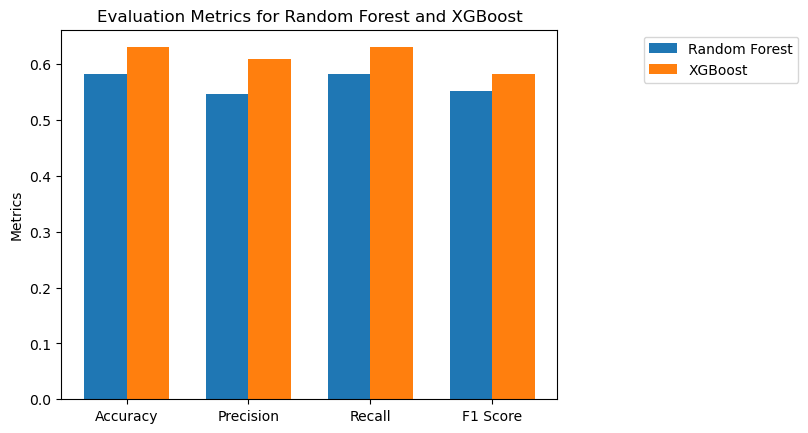

In [12]:
# Evaluation metrics for Random Forest
metrics_rf = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]

# Evaluation metrics for XGBoost
metrics_xg = [accuracy, precision, recall, f1_score]

# Labels for the metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Bar positions
x = np.arange(len(labels))

# Bar width
width = 0.35

# Plotting
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, metrics_rf, width, label='Random Forest')
bar2 = ax.bar(x + width/2, metrics_xg, width, label='XGBoost')

# Add labels, title, and legend to the top-right corner with improved layout
ax.set_ylabel('Metrics')
ax.set_title('Evaluation Metrics for Random Forest and XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Adjust layout to make space for the legend
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))

# Display the bar plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import xgboost as xgb
from scipy.stats import uniform, randint

# Load the data
dtm_df = pd.read_csv('dtm_df_trans.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dtm_df.iloc[:, :-1], dtm_df['skore'], test_size=0.2, random_state=42)

# Define parameter distributions for Random Search
param_dist = {
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 150),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
}

# XGBoost model
xg_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='merror')

# Random Search
random_search = RandomizedSearchCV(estimator=xg_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_xg_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='merror', **best_params)
best_xg_model.fit(X_train, y_train)

# Make predictions
predictions = best_xg_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, predictions)

# Metrics calculation
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)

# Print results
print("Best Parameters:", best_params)
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", accuracy)
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
